In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor,KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
inpatient = pd.read_csv("D:/Analytix labs/Assignments & Case Studies/Data Science with Python (Foundation) Case study/9. End to End Foundation Case Study-1/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv",sep=',')
outpatient = pd.read_csv("D:/Analytix labs/Assignments & Case Studies/Data Science with Python (Foundation) Case study/9. End to End Foundation Case Study-1/Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv",sep=',')

In [6]:
inpatient.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [7]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [8]:
inpatient.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,163065.0,255569.865428,151563.671767,10001.000000,110092.000000,250007.000000,380075.00000,670077.0000
Provider Zip Code,163065.0,47938.121908,27854.323080,1040.000000,27261.000000,44309.000000,72901.00000,99835.0000
Total Discharges,163065.0,42.776304,51.104042,11.000000,17.000000,27.000000,49.00000,3383.0000
Average Covered Charges,163065.0,36133.958434,35065.365905,2459.400000,15947.166670,25245.823530,43232.59259,929118.9091
Average Total Payments,163065.0,9707.477867,7664.642652,2673.000000,5234.500000,7214.100000,11286.40000,156158.1818
Average Medicare Payments,163065.0,8494.495174,7309.467247,1148.909091,4192.354839,6158.465116,10056.88235,154620.8182


In [9]:
outpatient.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [10]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [11]:
outpatient.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,43372.0,265410.921747,152729.927698,10001.00000,140043.000000,260091.000000,390101.000000,670061.000000
Provider Zip Code,43372.0,49041.022434,27497.899751,1040.00000,28645.000000,46342.000000,73101.000000,99801.000000
Outpatient Services,43372.0,587.980955,3280.397168,11.00000,42.000000,128.000000,347.000000,219042.000000
Average Estimated Submitted Charges,43372.0,1473.994047,1837.530791,12.64375,284.610498,709.995188,2102.121346,32105.636360
Average Total Payments,43372.0,265.425586,261.260146,7.30500,74.627714,139.298570,394.211316,2062.470526


Part1: Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

Part1A: Highest Cost Variation - Inpatient

In [47]:
inp_max=inpatient.loc[inpatient.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
inp_min=inpatient.loc[inpatient.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmin()].reset_index(drop=True)

In [48]:
inp_max

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,20017,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,99508,AK - Anchorage,23,34805.13043,8401.956522,6413.782609
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09375,8031.125000,5858.500000
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,98388.77778,9838.111111,8533.833333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30023,FLAGSTAFF MEDICAL CENTER,1200 NORTH BEAVER STREET,FLAGSTAFF,AZ,86001,AZ - Phoenix,15,27349.40000,11026.333330,9056.066667
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,27,90836.48148,12396.296300,11483.407410
...,...,...,...,...,...,...,...,...,...,...,...,...
5020,948 - SIGNS & SYMPTOMS W/O MCC,470003,FLETCHER ALLEN HOSPITAL OF VERMONT,111 COLCHESTER AVE,BURLINGTON,VT,5401,VT - Burlington,29,15493.03448,7147.310345,5725.482759
5021,948 - SIGNS & SYMPTOMS W/O MCC,500008,UNIVERSITY OF WASHINGTON MEDICAL CTR,1959 NE PACIFIC ST,SEATTLE,WA,98195,WA - Seattle,26,18125.65385,8771.807692,6833.423077
5022,948 - SIGNS & SYMPTOMS W/O MCC,520098,UNIVERSITY OF WI HOSPITALS & CLINICS AUTHORITY,600 HIGHLAND AVENUE,MADISON,WI,53792,WI - Madison,37,14217.16216,7411.216216,6406.054054
5023,948 - SIGNS & SYMPTOMS W/O MCC,510001,WEST VIRGINIA UNIVERSITY HOSPITALS,MEDICAL CENTER DRIVE,MORGANTOWN,WV,26506,WV - Morgantown,85,12752.22353,5676.600000,5047.023529


In [49]:
inp_min

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,20017,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,99508,AK - Anchorage,23,34805.130430,8401.956522,6413.782609
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10100,THOMAS HOSPITAL,750 MORPHY AVENUE,FAIRHOPE,AL,36532,AL - Mobile,18,10710.888890,4968.000000,3898.888889
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40134,ARKANSAS HEART HOSPITAL,1701 S SHACKLEFORD ROAD,LITTLE ROCK,AR,72211,AR - Little Rock,66,24489.939390,5225.590909,4068.106061
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30100,CARONDELET HEART AND VASCULAR INSTITUTE,4888 NORTH STONE AVENUE,TUCSON,AZ,85704,AZ - Tucson,14,25757.642860,5976.000000,3592.857143
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50351,TORRANCE MEMORIAL MEDICAL CENTER,3330 LOMITA BLVD,TORRANCE,CA,90509,CA - Los Angeles,17,30510.294120,6793.647059,5009.941176
...,...,...,...,...,...,...,...,...,...,...,...,...
5020,948 - SIGNS & SYMPTOMS W/O MCC,470005,RUTLAND REGIONAL MEDICAL CENTER,160 ALLEN ST,RUTLAND,VT,5701,VT - Burlington,18,13390.000000,5456.833333,4705.722222
5021,948 - SIGNS & SYMPTOMS W/O MCC,500024,PROVIDENCE ST PETER HOSPITAL,413 LILLY ROAD NE,OLYMPIA,WA,98506,WA - Olympia,12,21513.250000,5941.333333,2786.666667
5022,948 - SIGNS & SYMPTOMS W/O MCC,520059,AURORA MEMORIAL HSPTL BURLINGTON,252 MCHENRY ST,BURLINGTON,WI,53105,WI - Milwaukee,11,18366.454550,7008.636364,2647.181818
5023,948 - SIGNS & SYMPTOMS W/O MCC,510023,WEIRTON MEDICAL CENTER,601 COLLIERS WAY,WEIRTON,WV,26062,PA - Pittsburgh,11,7280.363636,3304.545455,2484.181818


In [50]:
inp1=inp_max.copy()
inp1['Variation']=inp_max['Average Medicare Payments']-inp_min['Average Medicare Payments']
inp1.loc[inp1.groupby(['DRG Definition'])['Variation'].idxmax()].head(3)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Variation
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,17955.63636,16878.45455,15855.18182,11506.646106
55,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,148128.43750,25519.43750,22553.56250,18335.419643
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,64,54052.21875,50882.40625,48632.28125,40323.965461


For inpatient, providers 50441 and 210009 showing highest cost variation.

Part1A: Highest Cost Variation - Outpatient

In [38]:
out_max=outpatient.loc[outpatient.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
out_min=outpatient.loc[outpatient.groupby(['APC','Provider State'])['Average Total Payments'].idxmin()].reset_index(drop=True)

In [39]:
out_max

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
1,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
2,0012 - Level I Debridement & Destruction,40017,NORTH ARKANSAS REGIONAL MEDICAL CENTER,620 NORTH MAIN STREET,HARRISON,AR,72601,AR - Springdale,438,143.639406,28.401027
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,50017,MERCY GENERAL HOSPITAL,4001 J ST,SACRAMENTO,CA,95819,CA - Sacramento,18,39.888889,35.233333
...,...,...,...,...,...,...,...,...,...,...,...
1428,0698 - Level II Eye Tests & Treatments,490032,MEDICAL COLLEGE OF VIRGINIA HOSPITALS,1250 EAST MARSHALL STREET - BOX 980510,RICHMOND,VA,23298,VA - Richmond,940,204.474468,64.750000
1429,0698 - Level II Eye Tests & Treatments,470003,FLETCHER ALLEN HOSPITAL OF VERMONT,111 COLCHESTER AVE,BURLINGTON,VT,5401,VT - Burlington,2570,234.783269,73.320000
1430,0698 - Level II Eye Tests & Treatments,500008,UNIVERSITY OF WASHINGTON MEDICAL CTR,1959 NE PACIFIC ST,SEATTLE,WA,98195,WA - Seattle,29,219.379310,72.199655
1431,0698 - Level II Eye Tests & Treatments,520098,UNIVERSITY OF WI HOSPITALS & CLINICS AUTHORITY,600 HIGHLAND AVENUE,MADISON,WI,53792,WI - Madison,2852,211.752854,71.776392


In [40]:
out_min

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
1,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
2,0012 - Level I Debridement & Destruction,40118,NEA BAPTIST MEMORIAL HOSPITAL,3024 STADIUM BOULEVARD,JONESBORO,AR,72401,AR - Jonesboro,12,16.993333,12.646667
3,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
4,0012 - Level I Debridement & Destruction,50025,UNIVERSITY OF CALIFORNIA SAN DIEGO MEDICAL CENTER,200 WEST ARBOR DRIVE,SAN DIEGO,CA,92103,CA - San Diego,415,33.185542,16.571880
...,...,...,...,...,...,...,...,...,...,...,...
1428,0698 - Level II Eye Tests & Treatments,490007,SENTARA NORFOLK GENERAL HOSPITAL,600 GRESHAM DR,NORFOLK,VA,23507,VA - Norfolk,175,188.256914,62.420000
1429,0698 - Level II Eye Tests & Treatments,470003,FLETCHER ALLEN HOSPITAL OF VERMONT,111 COLCHESTER AVE,BURLINGTON,VT,5401,VT - Burlington,2570,234.783269,73.320000
1430,0698 - Level II Eye Tests & Treatments,500148,WENATCHEE VALLEY HOSPITAL,820 NORTH CHELAN STREET,WENATCHEE,WA,98801,WA - Spokane,774,108.089238,66.583566
1431,0698 - Level II Eye Tests & Treatments,520045,THEDA CLARK MED CTR,130 2ND ST,NEENAH,WI,54956,WI - Neenah,57,135.754386,64.740000


In [45]:
out1=out_max.copy()
out1['Variation']=out_max['Average Total Payments']-out_min['Average Total Payments']
out1.loc[out1.groupby(['APC'])['Variation'].idxmax()].head(3)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,Variation
20,0012 - Level I Debridement & Destruction,230302,HENRY FORD WEST BLOOMFIELD HOSPITAL,6777 WEST MAPLE ROAD,W BLOOMFIELD,MI,48322,MI - Royal Oak,46,107.331304,27.898261,20.593261
51,0013 - Level II Debridement & Destruction,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,20,235.417500,85.930000,47.025556
101,0015 - Level III Debridement & Destruction,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,329,685.188450,142.186505,83.536505


For inpatient, providers 230302, 50334 and 50153 showing highest cost variation.

Part1B: Highest-Cost Claims by Provider - Inpatient

In [62]:
cost_claim = inpatient.loc[inpatient.groupby(['DRG Definition','Provider Id'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
highest_cost_claim = cost_claim.loc[cost_claim.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()].head()
highest_cost_claim

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,proc
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,17955.63636,16878.45455,15855.18182,93.024794
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,83,26402.79518,24865.61446,22873.49398,24.001452
2986,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,64,54052.21875,50882.40625,48632.28125,35.158203
4156,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,19,111618.15790,24352.05263,23402.26316,49.988919
6365,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,34,77093.05882,14744.05882,13710.23529,30.406574


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD65D169C8>],
      dtype=object)

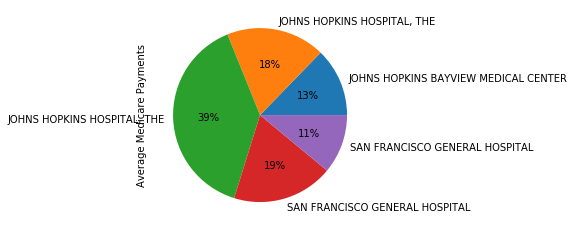

In [65]:
highest_cost_claim['Average Medicare Payments'].plot(kind='pie', 
            labels=highest_cost_claim["Provider Name"],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

For inpatient, highest cost claimed by providers with IDs - 210029, 50228 having DRG Definition as shown above.

Part1B: Highest-Cost Claims by Provider - Outpatient

In [66]:
cost_claim1 = outpatient.loc[outpatient.groupby(['APC','Provider Id'])['Average Total Payments'].idxmax()].reset_index(drop=True)
highest_cost_claim1 = cost_claim1.loc[cost_claim1.groupby(['APC'])['Average Total Payments'].idxmax()].head()
highest_cost_claim1

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,proc
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853,0.113648
424,0013 - Level II Debridement & Destruction,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,20,235.417500,85.930000,7.474375
1874,0015 - Level III Debridement & Destruction,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,329,685.188450,142.186505,1.650462
3322,0019 - Level I Excision/ Biopsy,50002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,CA - Alameda County,16,8766.475000,470.720000,518.484688
3837,0020 - Level II Excision/ Biopsy,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,96,3418.156250,808.850000,27.180273


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD6707DE88>],
      dtype=object)

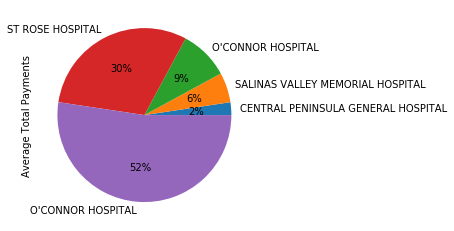

In [68]:
highest_cost_claim1['Average Total Payments'].plot(kind='pie', 
            labels=highest_cost_claim1["Provider Name"],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

For outpatient, highest cost claimed by providers with IDs - 20024,50334,50153,50002 having DRG Definition as shown above.

Part1C: Highest-Cost Claims by Region - Inpatient

In [70]:
cost_claim2 = inpatient.loc[inpatient.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
highest_cost_claim2 = cost_claim2.loc[cost_claim2.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()].head()
highest_cost_claim2

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,proc
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,17955.63636,16878.45455,15855.18182,93.024794
71,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,83,26402.79518,24865.61446,22873.49398,24.001452
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,64,54052.21875,50882.40625,48632.28125,35.158203
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,19,111618.15790,24352.05263,23402.26316,49.988919
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,34,77093.05882,14744.05882,13710.23529,30.406574


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD66AD5DC8>],
      dtype=object)

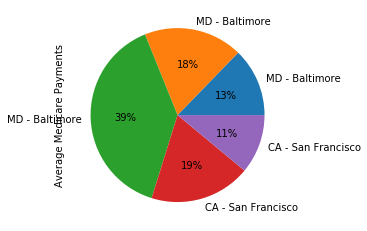

In [71]:
highest_cost_claim2['Average Medicare Payments'].plot(kind='pie', 
            labels=highest_cost_claim2["Hospital Referral Region (HRR) Description"],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

For inpatient, highest cost claimed by regions MD, CA having DRG Definition as shown above.

Part1C: Highest-Cost Claims by Region - Outpatient

In [72]:
cost_claim3 = outpatient.loc[outpatient.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
highest_cost_claim3 = cost_claim3.loc[cost_claim3.groupby(['APC'])['Average Total Payments'].idxmax()].head()
highest_cost_claim3

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,proc
0,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853,0.113648
51,0013 - Level II Debridement & Destruction,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,20,235.417500,85.930000,7.474375
101,0015 - Level III Debridement & Destruction,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,329,685.188450,142.186505,1.650462
150,0019 - Level I Excision/ Biopsy,50002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,CA - Alameda County,16,8766.475000,470.720000,518.484688
194,0020 - Level II Excision/ Biopsy,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,96,3418.156250,808.850000,27.180273


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD699C97C8>],
      dtype=object)

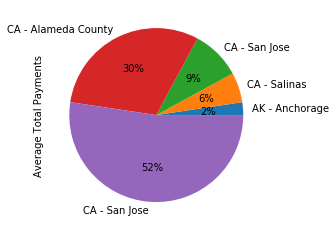

In [73]:
highest_cost_claim3['Average Total Payments'].plot(kind='pie', 
            labels=highest_cost_claim3["Hospital Referral Region (HRR) Description"],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

For outpatient, highest cost claimed by regions AK, CA having DRG Definition as shown above.

Part1D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements - inpatient

In [56]:
inpatient['proc']=(inpatient['Average Total Payments']-inpatient['Average Medicare Payments'])/inpatient['Total Discharges']
max_diff=inpatient.loc[inpatient.groupby(['DRG Definition','Provider State'])['proc'].idxmax()].reset_index(drop=True)
max_diff.loc[max_diff.groupby(['DRG Definition'])['proc'].idxmax()].head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,proc
14,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140008,LOYOLA GOTTLIEB MEMORIAL HOSPITAL,701 WEST NORTH AVE,MELROSE PARK,IL,60160,IL - Melrose Park,16,56027.00000,18420.562500,4401.875000,876.167969
66,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,150158,IU HEALTH WEST HOSPITAL,1111 N RONALD REAGAN PKWY,AVON,IN,46123,IN - Indianapolis,13,18670.07692,7398.153846,3304.461538,314.899408
116,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,140150,UNIVERSITY OF ILLINOIS HOSPITAL,1740 WEST TAYLOR ST SUITE 1400,CHICAGO,IL,60612,IL - Chicago,16,83504.31250,38370.000000,22039.375000,1020.664062
164,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,120011,KAISER FOUNDATION HOSPITAL,3288 MOANALUA RD,HONOLULU,HI,96819,HI - Honolulu,12,25010.91667,21032.083330,4109.250000,1410.236111
235,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,310006,"ST MARY'S HOSPITAL, PASSAIC",350 BOULEVARD,PASSAIC,NJ,7055,NJ - Hackensack,11,40431.72727,9945.636364,5129.000000,437.876033


Part1D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements - outpatient

In [57]:
outpatient['proc']=(outpatient['Average  Estimated Submitted Charges']-outpatient['Average Total Payments'])/outpatient['Outpatient Services']
max_diff1=outpatient.loc[outpatient.groupby(['APC','Provider State'])['proc'].idxmax()].reset_index(drop=True)
max_diff1.loc[max_diff1.groupby(['APC'])['proc'].idxmax()].head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,proc
27,0012 - Level I Debridement & Destruction,280129,NEBRASKA ORTHOPAEDIC HOSPITAL,2808 SOUTH 143RD PLZ,OMAHA,NE,68144,NE - Omaha,15,841.900000,14.460000,55.162667
48,0013 - Level II Debridement & Destruction,10158,RUSSELLVILLE HOSPITAL,15155 HIGHWAY 43,RUSSELLVILLE,AL,35653,AL - Birmingham,13,5231.000000,55.600000,398.107692
118,0015 - Level III Debridement & Destruction,230176,OAKWOOD SOUTHSHORE MEDICAL CENTER,5450 FORT STREET,TRENTON,MI,48183,MI - Dearborn,11,2661.200909,93.882727,233.392562
150,0019 - Level I Excision/ Biopsy,50739,CENTINELA HOSPITAL MEDICAL CENTER,555 EAST HARDY STREET,INGLEWOOD,CA,90301,CA - Los Angeles,12,26466.645000,392.840000,2172.817083
234,0020 - Level II Excision/ Biopsy,490112,CJW MEDICAL CENTER,1401 JOHNSTON WILLIS DRIVE,RICHMOND,VA,23235,VA - Richmond,11,15427.479090,567.060000,1350.947190


Part2: Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions.

Part2A: Providers Least Like Others - inpatient

In [74]:
a=inpatient[['Provider Id','Average Medicare Payments']].groupby('Provider Id').mean().reset_index()
a.head()

,Provider Id,Average Medicare Payments
0,10001,7678.218337
1,10005,5793.635452
2,10006,7145.964071
3,10007,4047.029737
4,10008,4963.552805


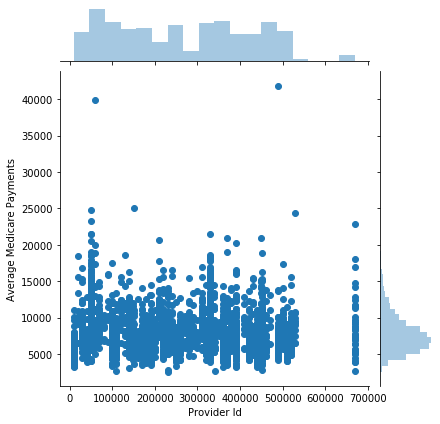

In [76]:
sns.jointplot(x='Provider Id', y='Average Medicare Payments', data=a)

In [77]:
model = LinearRegression()
model.fit(a['Provider Id'].values.reshape(-1,1),a['Average Medicare Payments'].values.reshape(-1,1))
a['Predicted']=model.predict(a['Provider Id'].values.reshape(-1,1))
a['Residual']=abs(a['Predicted']-a['Average Medicare Payments'])
a.sort_values('Residual',ascending=False).head(3)

,Provider Id,Average Medicare Payments,Predicted,Residual
3143,490142,41836.888890,7483.163626,34353.725264
540,60096,39943.173080,8420.791989,31522.381091
3295,530015,24350.493057,7396.228611,16954.264446


Part2A: Providers Least Like Others - outpatient

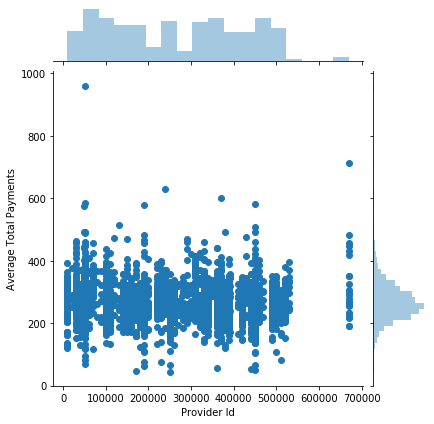

In [79]:
a1=outpatient[['Provider Id','Average Total Payments']].groupby('Provider Id').mean().reset_index()
sns.jointplot(x='Provider Id', y='Average Total Payments', data=a1)

In [80]:
model = LinearRegression()
model.fit(a1['Provider Id'].values.reshape(-1,1),a1['Average Total Payments'].values.reshape(-1,1))
a1['Predicted']=model.predict(a1['Provider Id'].values.reshape(-1,1))
a1['Residual']=abs(a1['Predicted']-a1['Average Total Payments'])
a1.sort_values('Residual',ascending=False).head(3)

,Provider Id,Average Total Payments,Predicted,Residual
432,50714,960.595632,275.415810,685.179823
3134,670061,712.396480,252.954963,459.441517
1474,240069,629.085289,268.548781,360.536508


Part2: B: Regions Least Like Others - inpatient

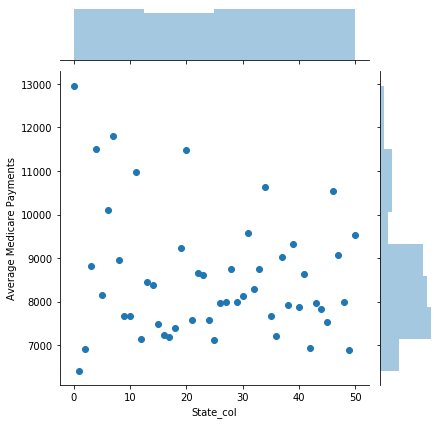

In [81]:
b=inpatient[['Provider State','Average Medicare Payments']].groupby('Provider State').mean().reset_index()
b['State_col']=b.index
sns.jointplot(x='State_col', y='Average Medicare Payments', data=b)

In [82]:
model = LinearRegression()
model.fit(b['State_col'].values.reshape(-1,1),b['Average Medicare Payments'].values.reshape(-1,1))
b['Predicted']=model.predict(b['State_col'].values.reshape(-1,1))
b['Residual']=abs(b['Predicted']-b['Average Medicare Payments'])
b.sort_values('Residual',ascending=False).head(3)

,Provider State,Average Medicare Payments,State_col,Predicted,Residual
0,AK,12958.973677,0,8960.607913,3998.365764
7,DC,11811.972137,7,8843.385320,2968.586816
20,MD,11480.126155,20,8625.686221,2854.439934


Part2: B: Regions Least Like Others - outpatient

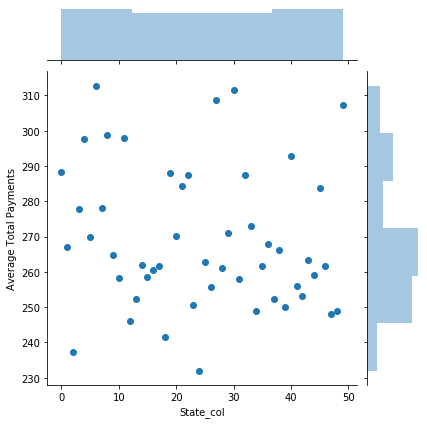

In [83]:
b1=outpatient[['Provider State','Average Total Payments']].groupby('Provider State').mean().reset_index()
b1['State_col']=b1.index
sns.jointplot(x='State_col', y='Average Total Payments', data=b1)

In [84]:
model = LinearRegression()
model.fit(b1['State_col'].values.reshape(-1,1), b1['Average Total Payments'].values.reshape(-1,1))
b1['Predicted']=model.predict(b1['State_col'].values.reshape(-1,1))
b1['Residual']=abs(b1['Predicted']-b1['Average Total Payments'])
b1.sort_values('Residual',ascending=False).head(3)

,Provider State,Average Total Payments,State_col,Predicted,Residual
30,NJ,311.496332,30,268.030556,43.465776
49,WY,307.213348,49,264.300992,42.912357
6,CT,312.802783,6,272.741585,40.061198
